# Features Only Tests
### In this notebook we evaluate the performance of LLM suggestions when based only on features (extracted with mzn2feat) and possibly descriptions. So no code is being sent to the LLM. 
#### For this evaluation, only the LLM that reached the highest score in preliminary phase is being tested (openai/gpt-oss-120b)

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import numpy as np
import os
from testLibs import *

In [14]:
# Features only tests

with open('../data/testOutputFeatOnly/LLMsuggestions_featOnly.json', 'r') as f1:
    featOnly = json.load(f1)

with open('../data/testOutputFeatOnly/LLMsuggestions_featOnly_Pdesc.json', 'r') as f2:
    featOnlyPdesc = json.load(f2)

with open('../data/testOutputFeatOnly/LLMsuggestions_featOnly_Sdesc.json', 'r') as f3:
    featOnlySdesc = json.load(f3)

with open('../data/testOutputFeatOnly/LLMsuggestions_featOnly_Pdesc_Sdesc.json', 'r') as f4:
    featOnlyPdescSdesc = json.load(f4)

# Minizinc challenge results

with open('../data/tablesJSON/allTables_free.json', 'r') as f5:
    MznResults = json.load(f5)


with open('../data/testOutputFeatOnly/LLMsuggestions_featOnly_remaining.json', 'r') as f6:
    featOnlyRem = json.load(f6)

# Features + models files

with open('../data/testOutputFeatModel/LLMsuggestions_modelFeat.json', 'r') as f7:
    featModel = json.load(f7)

with open('../data/testOutputFeatModel/LLMsuggestions_modelFeat_Pdesc.json', 'r') as f8:
    featModelPdesc = json.load(f8)

with open('../data/testOutputFeatModel/LLMsuggestions_modelFeat_Sdesc.json', 'r') as f9:
    featModelSdesc = json.load(f9)

with open('../data/testOutputFeatModel/LLMsuggestions_modelFeat_Pdesc_Sdesc.json', 'r') as f10:
    featModelPdescSdesc = json.load(f10)

# Features + Instance data

with open('../data/testOutputFeatModelInstance/LLMsuggestions_features.json', 'r') as f11:
    featInstance = json.load(f11)

with open('../data/testOutputFeatModelInstance/LLMsuggestions_features_Pdesc.json', 'r') as f12:
    featInstancePdesc = json.load(f12)

with open('../data/testOutputFeatModelInstance/LLMsuggestions_features_Sdesc.json', 'r') as f13:
    featInstanceSdesc = json.load(f13)

with open('../data/testOutputFeatModelInstance/LLMsuggestions_features_Pdesc_Sdesc.json', 'r') as f14:
    featInstancePdescSdesc = json.load(f14)

In [15]:
mzn_df = mznResultsFlattener(MznResults)

llm_df = ResultsFlattener(featOnly)
llmPD_df = ResultsFlattener(featOnlyPdesc)
llmSD_df = ResultsFlattener(featOnlySdesc)
llmPDSD_df = ResultsFlattener(featOnlyPdescSdesc)
llmRem_df = ResultsFlattener(featOnlyRem)

llmFeatModel_df = ResultsFlattener(featModel)
llmFeatModelPD_df = ResultsFlattener(featModelPdesc)
llmFeatModelSD_df = ResultsFlattener(featModelSdesc)
llmFeatModelPDSD_df = ResultsFlattener(featModelPdescSdesc)

llmFeatInstance_df = ResultsFlattener(featInstance)
llmFeatInstancePD_df = ResultsFlattener(featInstancePdesc)
llmFeatInstanceSD_df = ResultsFlattener(featInstanceSdesc)
llmFeatInstancePDSD_df = ResultsFlattener(featInstancePdescSdesc)

scored_df = scoreComputation(mzn_df)

/home/vro5/Coding/AgenticSolvers/test/notebooks/testLibs.py:109: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg = valid_objs.groupby(['Problem', 'Instance']).apply(best_worst).reset_index()


## Top 3 Parallel Evaluation

In [16]:
# --- Compute scores for different LLMResults variants ---
llm_summary = compute_llm_scores(llm_df, scored_df)
print('Top LLM Summary:')
display(llm_summary.sort_values('LLM_TotalScore', ascending=False))

llmPD_summary = compute_llm_scores(llmPD_df, scored_df)
print('Top+Desc LLM Summary:')
display(llmPD_summary.sort_values('LLM_TotalScore', ascending=False))

llmSD_summary = compute_llm_scores(llmSD_df, scored_df)
print('Top+SDesc LLM Summary:')
display(llmSD_summary.sort_values('LLM_TotalScore', ascending=False))

llmPDSD_summary = compute_llm_scores(llmPDSD_df, scored_df)
print('Top+SDesc+PDesc LLM Summary:')
display(llmPDSD_summary.sort_values('LLM_TotalScore', ascending=False))



llmFM_summary = compute_llm_scores(llmFeatModel_df, scored_df)
print('Feat + mzn LLM Summary:')
display(llmFM_summary.sort_values('LLM_TotalScore', ascending=False))

llmFMPD_summary = compute_llm_scores(llmFeatModelPD_df, scored_df)
print('Feat + mzn LLM Summary:')
display(llmFMPD_summary.sort_values('LLM_TotalScore', ascending=False))

llmFMSD_summary = compute_llm_scores(llmFeatModelSD_df, scored_df)
print('Feat + mzn LLM Summary:')
display(llmFMSD_summary.sort_values('LLM_TotalScore', ascending=False))

llmFMPDSD_summary = compute_llm_scores(llmFeatModelPDSD_df, scored_df)
print('Feat + mzn LLM Summary:')
display(llmFMPDSD_summary.sort_values('LLM_TotalScore', ascending=False))



llmFI_summary = compute_llm_scores(llmFeatInstance_df, scored_df)
print('Feat + mzn LLM Summary:')
display(llmFI_summary.sort_values('LLM_TotalScore', ascending=False))

llmFIPD_summary = compute_llm_scores(llmFeatInstancePD_df, scored_df)
print('Feat + mzn LLM Summary:')
display(llmFIPD_summary.sort_values('LLM_TotalScore', ascending=False))

llmFISD_summary = compute_llm_scores(llmFeatInstanceSD_df, scored_df)
print('Feat + mzn LLM Summary:')
display(llmFISD_summary.sort_values('LLM_TotalScore', ascending=False))

llmFIPDSD_summary = compute_llm_scores(llmFeatInstancePDSD_df, scored_df)
print('Feat + mzn LLM Summary:')
display(llmFIPDSD_summary.sort_values('LLM_TotalScore', ascending=False))

# --- Save all LLM scored variants  DataFrame to CSV ---
llm_summary.to_csv('../data/DFs/top3Scored/llm_featOnly.csv', index=False)
llmPD_summary.to_csv('../data/DFs/top3Scored/llm_featOnlyPDesc.csv', index=False)
llmSD_summary.to_csv('../data/DFs/top3Scored/llm_featOnlySDesc.csv', index=False)
llmPDSD_summary.to_csv('../data/DFs/top3Scored/llm_featOnlySDescPDesc.csv', index=False)

llmFM_summary.to_csv('../data/DFs/top3Scored/llm_featModel.csv', index=False)
llmFMPD_summary.to_csv('../data/DFs/top3Scored/llm_featModelPDesc.csv', index=False)
llmFMSD_summary.to_csv('../data/DFs/top3Scored/llm_featModelSDesc.csv', index=False)
llmFMPDSD_summary.to_csv('../data/DFs/top3Scored/llm_featModelPDescSDesc.csv', index=False)

llmFI_summary.to_csv('../data/DFs/top3Scored/llm_featInstance.csv', index=False)
llmFIPD_summary.to_csv('../data/DFs/top3Scored/llm_featInstancePDesc.csv', index=False)
llmFISD_summary.to_csv('../data/DFs/top3Scored/llm_featInstanceSDesc.csv', index=False)
llmFIPDSD_summary.to_csv('../data/DFs/top3Scored/llm_featInstancePDescSDesc.csv', index=False)

Top LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,82.25976,100,0.822598


Top+Desc LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,83.289246,99,0.841306


Top+SDesc LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,82.994278,100,0.829943


Top+SDesc+PDesc LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,83.731582,100,0.837316


Feat + mzn LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,78.371276,94,0.833737


Feat + mzn LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,78.530605,94,0.835432


Feat + mzn LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,66.874762,82,0.815546


Feat + mzn LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,64.774159,80,0.809677


Feat + mzn LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,74.803213,91,0.822013


Feat + mzn LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,69.284744,84,0.824818


Feat + mzn LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,66.346631,80,0.829333


Feat + mzn LLM Summary:


,provider,model,LLM_TotalScore,InstancesCovered,LLM_AvgScore
0,chat,openai/gpt-oss-120b,59.410873,73,0.813848


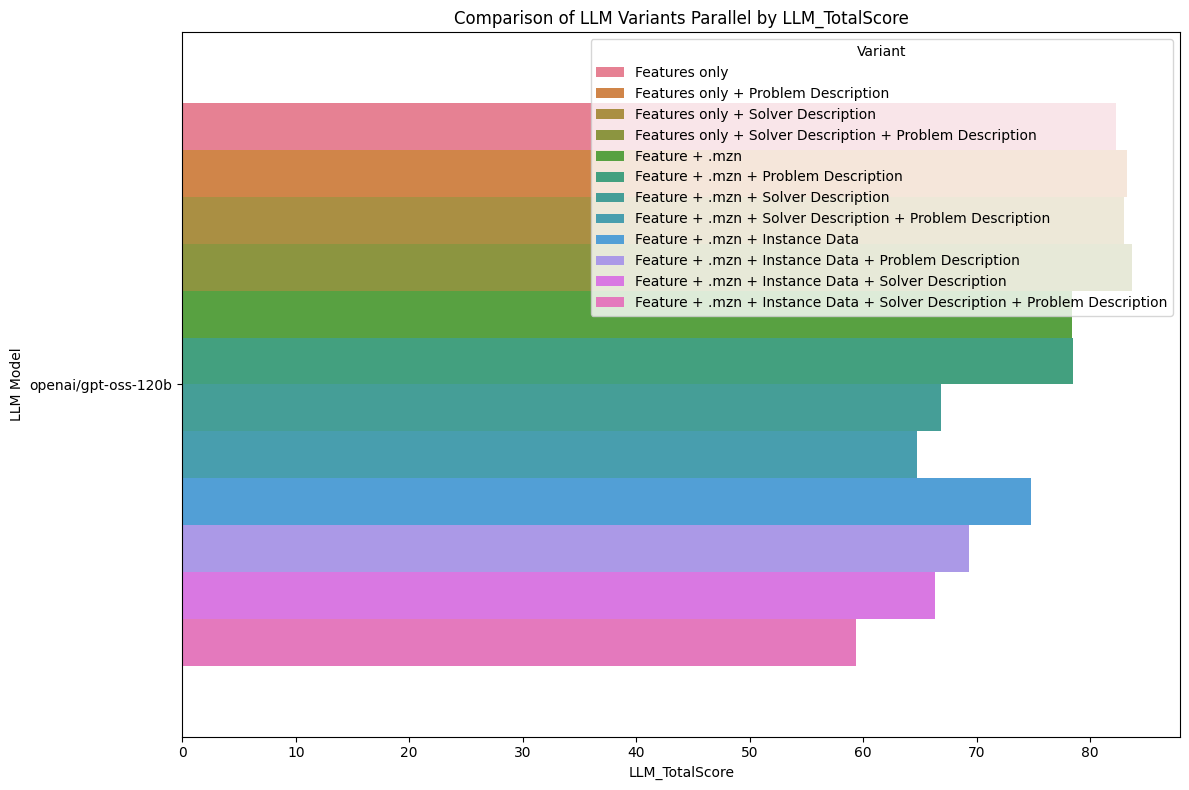

In [17]:
plot_llm_variant_comparison(
    [llm_summary, llmPD_summary, llmSD_summary, llmPDSD_summary, llmFM_summary, llmFMPD_summary, llmFMSD_summary, llmFMPDSD_summary, llmFI_summary, llmFIPD_summary, llmFISD_summary, llmFIPDSD_summary],
    ['Features only', 'Features only + Problem Description', 'Features only + Solver Description', 'Features only + Solver Description + Problem Description', 'Feature + .mzn', 'Feature + .mzn + Problem Description', 'Feature + .mzn + Solver Description', 'Feature + .mzn + Solver Description + Problem Description', 'Feature + .mzn + Instance Data', 'Feature + .mzn + Instance Data + Problem Description', 'Feature + .mzn + Instance Data + Solver Description', 'Feature + .mzn + Instance Data + Solver Description + Problem Description'],
    'LLM_TotalScore'
)

## Top 1 Evaluation

In [18]:
# --- Compute scores for different LLMResults variants ---
llm_top1_summary, llm_top1_scored = compute_top1_llm_scores(llm_df, scored_df)
print('LLM Summary:')
display(llm_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmPD_top1_summary, llmPD_top1_scored = compute_top1_llm_scores(llmPD_df, scored_df)
print('Top+Desc LLM Summary:')
display(llmPD_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmSD_top1_summary, llmSD_top1_scored = compute_top1_llm_scores(llmSD_df, scored_df)
print('Top+SDesc LLM Summary:')
display(llmSD_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmPDSD_top1_summary, llmPDSD_top1_scored = compute_top1_llm_scores(llmPDSD_df, scored_df)
print('Top+SDesc+PDesc LLM Summary:')
display(llmPDSD_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmRem_top1_summary, llmRem_top1_scored = compute_top1_llm_scores(llmRem_df, scored_df)
print('Remaining LLM Summary:')
display(llmRem_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))



llmFM_top1_summary, llmFM_top1_scored = compute_top1_llm_scores(llmFeatModel_df, scored_df)
print('features + .mzn LLM Summary:')
display(llmFM_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmFMPD_top1_summary, llmFMPD_top1_scored = compute_top1_llm_scores(llmFeatModelPD_df, scored_df)
print('features + .mzn + PDesc LLM Summary:')
display(llmFMPD_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmFMSD_top1_summary, llmFMSD_top1_scored = compute_top1_llm_scores(llmFeatModelSD_df, scored_df)
print('features + .mzn + SDesc LLM Summary:')
display(llmFMSD_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmFMPDSD_top1_summary, llmFMPDSD_top1_scored = compute_top1_llm_scores(llmFeatModelPDSD_df, scored_df)
print('features + .mzn + PDesc + SDesc LLM Summary:')
display(llmFMPDSD_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))



llmFI_top1_summary, llmFI_top1_scored = compute_top1_llm_scores(llmFeatInstance_df, scored_df)
print('features + .mzn + instance data + LLM Summary:')
display(llmFI_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmFIPD_top1_summary, llmFIPD_top1_scored = compute_top1_llm_scores(llmFeatInstancePD_df, scored_df)
print('features + .mzn + instance data + PDesc LLM Summary:')
display(llmFIPD_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmFISD_top1_summary, llmFISD_top1_scored = compute_top1_llm_scores(llmFeatInstanceSD_df, scored_df)
print('features + .mzn + instance data + SDesc LLM Summary:')
display(llmFISD_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))

llmFIPDSD_top1_summary, llmFIPDSD_top1_scored = compute_top1_llm_scores(llmFeatInstancePDSD_df, scored_df)
print('features + .mzn + instance data + PDesc + SDesc LLM Summary:')
display(llmFIPDSD_top1_summary.sort_values('LLM_Top1_TotalScore', ascending=False))


# --- Save all LLM scored variants  DataFrame to CSV ---
llm_top1_summary.to_csv('../data/DFs/top1Scored/llm_featOnly.csv', index=False)
llmPD_top1_summary.to_csv('../data/DFs/top1Scored/llm_featOnlyPDesc.csv', index=False)
llmSD_top1_summary.to_csv('../data/DFs/top1Scored/llm_featOnlySDesc.csv', index=False)
llmPDSD_top1_summary.to_csv('../data/DFs/top1Scored/llm_featOnlySDescPDesc.csv', index=False)

llmFM_top1_summary.to_csv('../data/DFs/top1Scored/llm_featModel.csv', index=False)
llmFMPD_top1_summary.to_csv('../data/DFs/top1Scored/llm_featModelPDesc.csv', index=False)
llmFMSD_top1_summary.to_csv('../data/DFs/top1Scored/llm_featModelSDesc.csv', index=False)
llmFMPDSD_top1_summary.to_csv('../data/DFs/top1Scored/llm_featModelPDescSDesc.csv', index=False)

llmFI_top1_summary.to_csv('../data/DFs/top1Scored/llm_featInstance.csv', index=False)
llmFIPD_top1_summary.to_csv('../data/DFs/top1Scored/llm_featInstancePDesc.csv', index=False)
llmFISD_top1_summary.to_csv('../data/DFs/top1Scored/llm_featInstanceSDesc.csv', index=False)
llmFIPDSD_top1_summary.to_csv('../data/DFs/top1Scored/llm_featInstancePDescSDesc.csv', index=False)


LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,73.600955,0.73601,100


Top+Desc LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,74.829813,0.755857,99


Top+SDesc LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,75.390197,0.753902,100


Top+SDesc+PDesc LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,75.659731,0.756597,100


Remaining LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
2,chat,moonshotai/kimi-k2-instruct,76.964375,0.769644,100
3,chat,moonshotai/kimi-k2-instruct-0905,74.414375,0.775150,96
0,chat,gemini-2.5-flash,70.995903,0.771695,92
1,chat,gemini-2.5-flash-lite,67.371055,0.756978,100


features + .mzn LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,70.368365,0.756649,94


features + .mzn + PDesc LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,71.916389,0.765068,94


features + .mzn + SDesc LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,61.68799,0.76158,82


features + .mzn + PDesc + SDesc LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,58.576543,0.741475,80


features + .mzn + instance data + LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,68.422708,0.760252,91


features + .mzn + instance data + PDesc LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,62.51655,0.753211,84


features + .mzn + instance data + SDesc LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,63.585459,0.804879,80


features + .mzn + instance data + PDesc + SDesc LLM Summary:


,provider,model,LLM_Top1_TotalScore,LLM_Top1_AvgScore,InstancesCovered
0,chat,openai/gpt-oss-120b,54.188182,0.763214,73


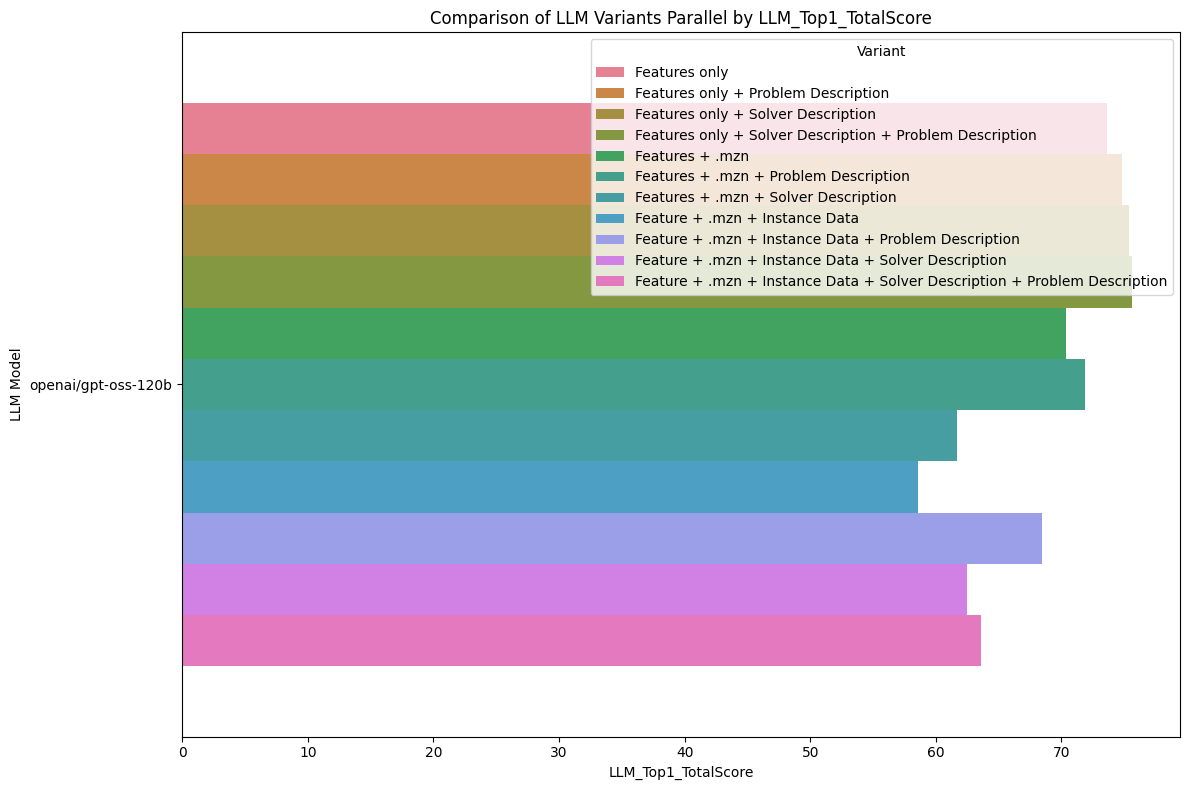

In [19]:
# --- Plot comparison of LLM top1 score variants ---
plot_llm_variant_comparison(
    [llm_top1_summary, llmPD_top1_summary, llmSD_top1_summary, llmPDSD_top1_summary, llmFM_top1_summary, llmFMPD_top1_summary, llmFMSD_top1_summary, llmFMPDSD_top1_summary, llmFI_top1_summary, llmFIPD_top1_summary, llmFISD_top1_summary, llmFIPDSD_top1_summary],
    ['Features only', 'Features only + Problem Description', 'Features only + Solver Description', 'Features only + Solver Description + Problem Description', 'Features + .mzn', 'Features + .mzn + Problem Description', 'Features + .mzn + Solver Description', 'Feature + .mzn + Instance Data', 'Feature + .mzn + Instance Data + Problem Description', 'Feature + .mzn + Instance Data + Solver Description', 'Feature + .mzn + Instance Data + Solver Description + Problem Description'],
    'LLM_Top1_TotalScore'
)

In [20]:
merged_llm_summary = merge_llm_variants(
    llm_top1_summary, llmPD_top1_summary, llmSD_top1_summary, llmPDSD_top1_summary, llmFM_top1_summary, llmFMPD_top1_summary, llmFMSD_top1_summary, llmFMPDSD_top1_summary, llmFI_top1_summary, llmFIPD_top1_summary, llmFISD_top1_summary, llmFIPDSD_top1_summary,
    variant_labels=['Features only', 'Features only + Problem Description', 'Features only + Solver Description', 'Features only + Solver Description + Problem Description', 'Feature + .mzn', 'Feature + .mzn + Problem Description', 'Feature + .mzn + Solver Description', 'Feature + .mzn + Instance Data', 'Feature + .mzn + Instance Data + Problem Description', 'Feature + .mzn + Instance Data + Solver Description', 'Feature + .mzn + Instance Data + Solver Description + Problem Description']
)

In [21]:
df = pd.read_csv("../data/DFs/solverComparison/generalScores_free.csv")

# We put together both solver total score and LLM variants total score, to see how LLMs compare to single solvers
llm_totscores = merged_llm_summary.copy()

# Rename LLM_Top1_TotalScore to TotalScore and Model_Variant to Solver
llm_totscores = llm_totscores.rename(columns={'LLM_Top1_TotalScore': 'TotalScore', 'Model_Variant': 'Solver'})
# We drop LLM_Top1_AvgScore, InstancesCovered, model and provider columns
llm_totscores = llm_totscores.drop(columns=['LLM_Top1_AvgScore', 'InstancesCovered', 'model', 'provider'])

# We add a column to distinguish solver from LLM variants
llm_totscores['Type'] = 'LLM Variant'

# Remove existing solvers with the same name and replace with new entries
df_filtered = df[~df['Solver'].isin(llm_totscores['Solver'])]
generalScores = pd.concat([df_filtered, llm_totscores], ignore_index=True)

generalScores_df = generalScores.sort_values('TotalScore', ascending=False)
print('General Scores (LLM variants + Solvers):')
display(generalScores_df)

# --- Save all general scores DataFrame to CSV ---
generalScores_df.to_csv('../data/DFs/solverComparison/generalScores_free.csv', index=False)

General Scores (LLM variants + Solvers):


,TotalScore,Solver,Type
0,77.260854,openai/gpt-oss-120b (Solvers Description + Pro...,LLM Variant
1,76.964375,moonshotai/kimi-k2-instruct-0905 (Solvers Desc...,LLM Variant
2,76.964375,moonshotai/kimi-k2-instruct-0905 (Solvers Desc...,LLM Variant
3,76.964375,moonshotai/kimi-k2-instruct (Solvers Description),LLM Variant
4,76.964375,or-tools_cp-sat-free,Solver
43,75.659731,openai/gpt-oss-120b (Features only + Solver De...,LLM Variant
42,75.390197,openai/gpt-oss-120b (Features only + Solver De...,LLM Variant
41,74.829813,openai/gpt-oss-120b (Features only + Problem D...,LLM Variant
5,74.488278,openai/gpt-oss-120b (Simple),LLM Variant
6,74.464375,moonshotai/kimi-k2-instruct (Solvers Descripti...,LLM Variant


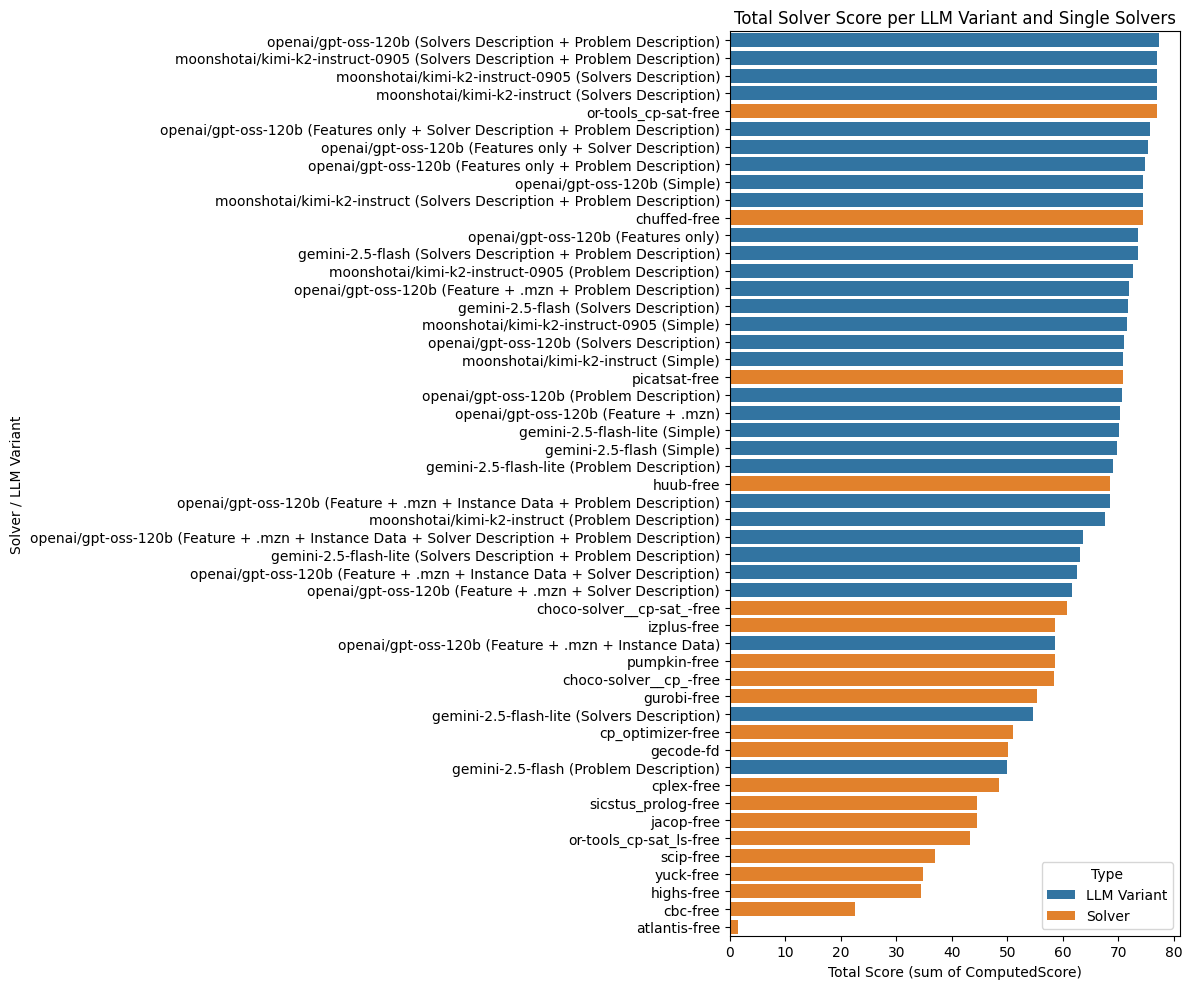

In [22]:
plot_df = generalScores_df.sort_values('TotalScore', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(
    x=plot_df['TotalScore'], 
    y=plot_df['Solver'],
    hue=plot_df['Type']
)
plt.title("Total Solver Score per LLM Variant and Single Solvers")
plt.xlabel("Total Score (sum of ComputedScore)")
plt.ylabel("Solver / LLM Variant")
plt.tight_layout()
plt.show()

## Closed Gap Evaluation

In [23]:
def compute_closed_gap(llm_top1_scored, scored_df):
    SBS_SOLVER = 'or-tools_cp-sat-free'

    cg_results = []

    # Compute VBS scores for all instances once (always over all instances)
    vbs_df = (
        scored_df.groupby(['Problem', 'Instance'], as_index=False)['ComputedScore']
        .max()
        .rename(columns={'ComputedScore': 'VBS_Score'})
    )
    vbs_total = vbs_df['VBS_Score'].sum()

    # Compute SBS score over all instances (not limited to model coverage)
    sbs_total = scored_df.loc[scored_df['Solver'] == SBS_SOLVER, 'ComputedScore'].sum()

    for (prov, mod), group in llm_top1_scored.groupby(['provider', 'model']):
        # Instances this model actually made predictions for
        covered = group[['problem', 'instance']].drop_duplicates()

        # Compute total scores for this model (only over its covered predictions)
        score_AS = group['ComputedScore'].sum()
        score_SBS = sbs_total
        score_VBS = vbs_total

        # Compute closed gap
        cg = (score_AS - score_SBS) / (score_VBS - score_SBS) if (score_VBS - score_SBS) != 0 else float('nan')

        cg_results.append({
            'provider': prov,
            'model': mod,
            'InstancesCovered': len(covered),
            'AS': score_AS,
            'SBS': score_SBS,
            'VBS': score_VBS,
            'ClosedGap': cg,
        })
    return cg_results


# --- compute closed gap for different LLM feat only variants ---
llm_cg_results = compute_closed_gap(llm_top1_scored, scored_df)
llm_cg_df = pd.DataFrame(llm_cg_results).sort_values('ClosedGap', ascending=False)
print('Top LLM Closed Gap:')
display(llm_cg_df)

llmPD_cg_results = compute_closed_gap(llmPD_top1_scored, scored_df)
llmPD_cg_df = pd.DataFrame(llmPD_cg_results).sort_values('ClosedGap', ascending=False)
print('Top+Desc LLM Closed Gap:')
display(llmPD_cg_df)

llmSD_cg_results = compute_closed_gap(llmSD_top1_scored, scored_df)
llmSD_cg_df = pd.DataFrame(llmSD_cg_results).sort_values('ClosedGap', ascending=False)
print('Top+SDesc LLM Closed Gap:')
display(llmSD_cg_df)

llmPDSD_cg_results = compute_closed_gap(llmPDSD_top1_scored, scored_df)
llmPDSD_cg_df = pd.DataFrame(llmPDSD_cg_results).sort_values('ClosedGap', ascending=False)
print('Top+SDesc+PDesc LLM Closed Gap:')
display(llmPDSD_cg_df)


# --- compute closed gap for different feat + model LLM variants ---
llmFM_cg_results = compute_closed_gap(llmFM_top1_scored, scored_df)
llmFM_cg_df = pd.DataFrame(llmFM_cg_results).sort_values('ClosedGap', ascending=False)
print('Top LLM Closed Gap:')
display(llmFM_cg_df)

llmFMPD_cg_results = compute_closed_gap(llmFMPD_top1_scored, scored_df)
llmFMPD_cg_df = pd.DataFrame(llmFMPD_cg_results).sort_values('ClosedGap', ascending=False)
print('Top+Desc LLM Closed Gap:')
display(llmFMPD_cg_df)

llmFMSD_cg_results = compute_closed_gap(llmFMSD_top1_scored, scored_df)
llmFMSD_cg_df = pd.DataFrame(llmFMSD_cg_results).sort_values('ClosedGap', ascending=False)
print('Top+SDesc LLM Closed Gap:')
display(llmFMSD_cg_df)

llmFMPDSD_cg_results = compute_closed_gap(llmFMPDSD_top1_scored, scored_df)
llmFMPDSD_cg_df = pd.DataFrame(llmFMPDSD_cg_results).sort_values('ClosedGap', ascending=False)
print('Top+Desc+PDesc LLM Closed Gap:')
display(llmFMPDSD_cg_df)

# --- compute closed gap for different feat + instance LLM variants ---
llmFI_cg_results = compute_closed_gap(llmFI_top1_scored, scored_df)
llmFI_cg_df = pd.DataFrame(llmFI_cg_results).sort_values('ClosedGap', ascending=False)
print('Top LLM Closed Gap:')
display(llmFI_cg_df)

llmFIPD_cg_results = compute_closed_gap(llmFIPD_top1_scored, scored_df)
llmFIPD_cg_df = pd.DataFrame(llmFIPD_cg_results).sort_values('ClosedGap', ascending=False)
print('Top+Desc LLM Closed Gap:')
display(llmFIPD_cg_df)

llmFISD_cg_results = compute_closed_gap(llmFISD_top1_scored, scored_df)
llmFISD_cg_df = pd.DataFrame(llmFISD_cg_results).sort_values('ClosedGap', ascending=False)
print('Top+SDesc LLM Closed Gap:')
display(llmFISD_cg_df)

llmFIPDSD_cg_results = compute_closed_gap(llmFIPDSD_top1_scored, scored_df)
llmFIPDSD_cg_df = pd.DataFrame(llmFIPDSD_cg_results).sort_values('ClosedGap', ascending=False)
print('Top+Desc+PDesc LLM Closed Gap:')
display(llmFIPDSD_cg_df)


# --- Save all Closed Gap LLM scored variants  DataFrame to CSV ---
os.makedirs('../data/DFs/closedGap', exist_ok=True)
llm_cg_df.to_csv('../data/DFs/closedGap/llm_featOnly.csv', index=False)
llmPD_cg_df.to_csv('../data/DFs/closedGap/llm_Desc_featOnly.csv', index=False)
llmSD_cg_df.to_csv('../data/DFs/closedGap/llm_SDesc_featOnly.csv', index=False)
llmPDSD_cg_df.to_csv('../data/DFs/closedGap/llm_SDescPDesc_featOnly.csv', index=False)

llmFM_cg_df.to_csv('../data/DFs/closedGap/llm_featModel.csv', index=False)
llmFMPD_cg_df.to_csv('../data/DFs/closedGap/llm_Desc_featModel.csv', index=False)
llmFMSD_cg_df.to_csv('../data/DFs/closedGap/llm_SDesc_featModel.csv', index=False)
llmFMPDSD_cg_df.to_csv('../data/DFs/closedGap/llm_PDesc_SDesc_featModel.csv', index=False)

llmFI_cg_df.to_csv('../data/DFs/closedGap/llm_featInstance.csv', index=False)
llmFIPD_cg_df.to_csv('../data/DFs/closedGap/llm_Desc_featInstance.csv', index=False)
llmFISD_cg_df.to_csv('../data/DFs/closedGap/llm_SDesc_featInstance.csv', index=False)
llmFIPDSD_cg_df.to_csv('../data/DFs/closedGap/llm_PDesc_SDesc_featInstance.csv', index=False)


Top LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,100,73.600955,76.964375,89.0,-0.279455


Top+Desc LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,99,74.829813,76.964375,89.0,-0.177354


Top+SDesc LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,100,75.390197,76.964375,89.0,-0.130793


Top+SDesc+PDesc LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,100,75.659731,76.964375,89.0,-0.108399


Top LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,94,70.368365,76.964375,89.0,-0.548041


Top+Desc LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,94,71.916389,76.964375,89.0,-0.41942


Top+SDesc LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,82,61.68799,76.964375,89.0,-1.269264


Top+Desc+PDesc LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,80,58.576543,76.964375,89.0,-1.527784


Top LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,91,68.422708,76.964375,89.0,-0.709699


Top+Desc LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,84,62.51655,76.964375,89.0,-1.200422


Top+SDesc LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,80,63.585459,76.964375,89.0,-1.11161


Top+Desc+PDesc LLM Closed Gap:


,provider,model,InstancesCovered,AS,SBS,VBS,ClosedGap
0,chat,openai/gpt-oss-120b,73,54.188182,76.964375,89.0,-1.892398


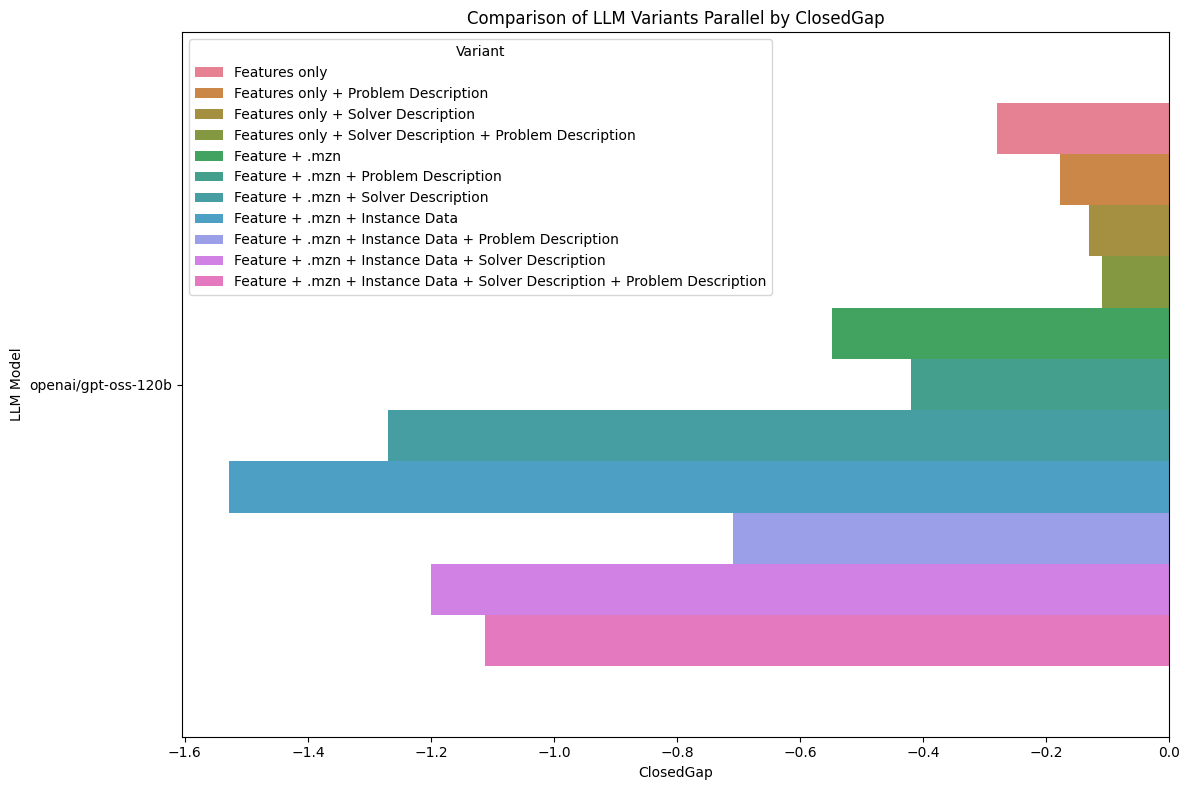

In [24]:
# --- Plot comparison of closedgap in LLM variants ---
plot_llm_variant_comparison(
    [llm_cg_df, llmPD_cg_df, llmSD_cg_df, llmPDSD_cg_df, llmFM_cg_df, llmFMPD_cg_df, llmFMSD_cg_df, llmFMPDSD_cg_df, llmFI_cg_df, llmFIPD_cg_df, llmFISD_cg_df, llmFIPDSD_cg_df],
    ['Features only', 'Features only + Problem Description', 'Features only + Solver Description', 'Features only + Solver Description + Problem Description', 'Feature + .mzn', 'Feature + .mzn + Problem Description', 'Feature + .mzn + Solver Description', 'Feature + .mzn + Instance Data', 'Feature + .mzn + Instance Data + Problem Description', 'Feature + .mzn + Instance Data + Solver Description', 'Feature + .mzn + Instance Data + Solver Description + Problem Description'],
    'ClosedGap'
)